In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Load the data with pandas
df = pd.read_csv('../gapminder.csv', low_memory=False)
df.head()

,id,continent,country,incomeperperson,alcconsumption,breastcancerper100th,co2emissions,femaleemployrate,HIVrate,lifeexpectancy,suicideper100th,employrate,urbanrate,breastcancernbdeaths
0,1,Asia,Afghanistan,0.000000,0.03,26.8,7.594400e+07,25.600000,NaN,48.673,6.684385,55.700001,24.04,874
1,2,Europe,Albania,1914.996551,7.29,57.4,2.237473e+08,42.099998,NaN,76.918,7.699330,51.400002,46.72,300
2,3,Africa,Algeria,2231.993335,0.69,23.5,2.932109e+09,31.700001,0.1,73.131,4.848770,50.500000,65.22,2019
3,4,Africa,Angola,1381.004268,5.57,23.1,2.483580e+08,69.400002,2.0,51.093,14.554677,75.699997,56.70,654
4,5,South America,Argentina,10749.419238,9.35,73.9,5.872119e+09,45.900002,0.5,75.901,7.765584,58.400002,92.00,5362


In [12]:
# Convert columns from strings to numeric
columns = ['incomeperperson', 'alcconsumption', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'lifeexpectancy', 'suicideper100th', 'employrate', 'urbanrate']
df2 = df[columns].apply(pd.to_numeric, errors='coerce')
df2['country'] = df['country']
df2['continent'] = df['continent']

In [14]:
#Remove null values
df2= df2.replace(0, np.NaN)
df2 = df2.dropna()

In [16]:
#Categorical variable to label incomeperperson
df2['incomelabel'] = pd.cut(df2.incomeperperson,4,labels=['low','medium','high','very high'])

#Categorical variable to breastcancerper100th
df2['cancercaseslabel'] = pd.cut(df2.breastcancerper100th,4,labels=['low','medium','high','very high'])

#Categorical variable to breastcancerper100th
df2['lifeexpectlabel'] = pd.cut(df2.lifeexpectancy,4,labels=['low','medium','high','very high'])

In [17]:
data = df2[['continent', 'country', 'incomeperperson', 'incomelabel', 'breastcancerper100th', 'cancercaseslabel', 'lifeexpectancy', 'lifeexpectlabel']]

## Frequencies

In [18]:
print("Values for incomeperperson:")
incomeperperson_freq = pd.concat(dict(counts = data["incomeperperson"].value_counts(sort=False, bins=10, dropna=False), percentages = data["incomeperperson"].value_counts(sort=False, bins=10, dropna=False, normalize=True)), axis=1)
print(incomeperperson_freq)

Values for incomeperperson:
                                counts  percentages
(51.577000000000005, 5323.557]     105     0.660377
(5323.557, 10543.338]               18     0.113208
(10543.338, 15763.119]              10     0.062893
(15763.119, 20982.9]                 4     0.025157
(20982.9, 26202.682]                 7     0.044025
(26202.682, 31422.463]               6     0.037736
(31422.463, 36642.244]               4     0.025157
(36642.244, 41862.025]               4     0.025157
(41862.025, 47081.806]               0     0.000000
(47081.806, 52301.587]               1     0.006289


In [19]:
print("Values for lifeexpectancy:")
lifeexpectancy_freq = pd.concat(dict(counts = data["lifeexpectancy"].value_counts(sort=False, bins=10, dropna=False), percentages = data["lifeexpectancy"].value_counts(sort=False, bins=10, dropna=False, normalize=True)), axis=1)
print(lifeexpectancy_freq)

Values for lifeexpectancy:
                              counts  percentages
(47.757000000000005, 51.354]      11     0.069182
(51.354, 54.914]                  10     0.062893
(54.914, 58.474]                   9     0.056604
(58.474, 62.034]                   7     0.044025
(62.034, 65.594]                  10     0.062893
(65.594, 69.154]                  16     0.100629
(69.154, 72.714]                  13     0.081761
(72.714, 76.274]                  42     0.264151
(76.274, 79.834]                  18     0.113208
(79.834, 83.394]                  23     0.144654


In [20]:
print("Values for breastcancerper100th:")
breastcancerper100th_freq = pd.concat(dict(counts = data["breastcancerper100th"].value_counts(sort=False, bins=10, dropna=False), percentages = data["breastcancerper100th"].value_counts(sort=False, bins=10, dropna=False, normalize=True)), axis=1)
print(breastcancerper100th_freq)

Values for breastcancerper100th:
                counts  percentages
(3.802, 13.62]      13     0.081761
(13.62, 23.34]      37     0.232704
(23.34, 33.06]      42     0.264151
(33.06, 42.78]      14     0.088050
(42.78, 52.5]       19     0.119497
(52.5, 62.22]        8     0.050314
(62.22, 71.94]       4     0.025157
(71.94, 81.66]       6     0.037736
(81.66, 91.38]      12     0.075472
(91.38, 101.1]       4     0.025157


In [21]:
income_freq = pd.concat(dict(counts = df2["incomelabel"].value_counts(sort=False, dropna=False),
                                   percentages = data["incomelabel"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution income per person:\n", income_freq)

Frequency distribution income per person:
            counts  percentages
low           129     0.811321
medium         15     0.094340
high           12     0.075472
very high       3     0.018868


In [22]:
#Countries with high and very high incomes
print('Countries with high and very high incomes')
highincome = data[(data['incomelabel'] == 'high') | (data['incomelabel'] == 'very high') ]
print(highincome.loc[:, ['country', 'incomeperperson', 'incomelabel']].sort_values(by='incomelabel', ascending=False))

Countries with high and very high incomes
            country  incomeperperson incomelabel
81            Japan     39309.478859   very high
96       Luxembourg     52301.587179   very high
118          Norway     39972.352768   very high
7           Austria     26692.984107        high
44          Denmark     30532.277044        high
55          Finland     27110.731591        high
72          Iceland     33945.314422        high
77          Ireland     27595.091347        high
113     Netherlands     26551.844238        high
129           Qatar     33931.832079        high
138       Singapore     32535.832512        high
149          Sweden     32292.482984        high
150     Switzerland     37662.751250        high
163  United Kingdom     28033.489283        high
164   United States     37491.179523        high


In [23]:
#Countries with low incomes
print('Countries with low incomes')
highincome = data[(data['incomelabel'] == 'low')]
print(highincome.loc[:, ['country', 'incomeperperson', 'incomelabel']].sort_values(by='incomelabel', ascending=False))

Countries with low incomes
            country  incomeperperson incomelabel
1           Albania      1914.996551         low
89             Laos       554.879840         low
125     Philippines      1383.401869         low
124            Peru      3180.430612         low
123        Paraguay      1621.177078         low
..              ...              ...         ...
48            Egypt      1975.551906         low
47          Ecuador      1728.020976         low
46   Dominican Rep.      4049.169629         low
43       Czech Rep.      7381.312751         low
172        Zimbabwe       320.771890         low

[129 rows x 3 columns]


In [24]:
breastcan_freq = pd.concat(dict(counts = data["cancercaseslabel"].value_counts(sort=False, dropna=False),
                                   percentages = data["cancercaseslabel"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution breast cancer:\n", breastcan_freq)

Frequency distribution breast cancer:
            counts  percentages
low            74     0.465409
medium         51     0.320755
high           17     0.106918
very high      17     0.106918


In [25]:
lifeexp_freq = pd.concat(dict(counts = data["lifeexpectlabel"].value_counts(sort=False, dropna=False),
                                   percentages = data["lifeexpectlabel"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution life expectancy:\n", lifeexp_freq)

Frequency distribution life expectancy:
            counts  percentages
low            25     0.157233
medium         22     0.138365
high           55     0.345912
very high      57     0.358491


In [26]:
#Countries with very high life expectancy
print('Countries with very high life expectancy')
highincome = data[(data['lifeexpectlabel'] == 'very high') ]
print(highincome.loc[:, ['country', 'lifeexpectancy', 'lifeexpectlabel']].sort_values(by='lifeexpectlabel', ascending=False))

Countries with very high life expectancy
                    country  lifeexpectancy lifeexpectlabel
1                   Albania          76.918       very high
81                    Japan          83.394       very high
94                    Libya          74.788       very high
96               Luxembourg          79.963       very high
97            Macedonia FYR          74.847       very high
102                   Malta          79.634       very high
105                  Mexico          76.954       very high
113             Netherlands          80.734       very high
114             New Zealand          80.654       very high
118                  Norway          81.097       very high
121                  Panama          76.128       very high
126                  Poland          76.126       very high
127                Portugal          79.499       very high
129                   Qatar          78.371       very high
138               Singapore          81.126       very high

In [27]:
#Countries with low life expectancy
print('Countries with very high life expectancy')
highincome = data[(data['lifeexpectlabel'] == 'low') ]
print(highincome.loc[:, ['country', 'lifeexpectancy', 'lifeexpectlabel']].sort_values(by='lifeexpectlabel', ascending=False))

Countries with very high life expectancy
                  country  lifeexpectancy lifeexpectlabel
3                  Angola          51.093             low
99                 Malawi          54.210             low
171                Zambia          49.025             low
160                Uganda          54.116             low
148             Swaziland          48.718             low
143          South Africa          52.797             low
137          Sierra Leone          47.794             low
132                Rwanda          55.442             low
117               Nigeria          51.879             low
116                 Niger          54.675             low
109            Mozambique          50.239             low
101                  Mali          51.444             low
67          Guinea-Bissau          48.132             low
16                  Benin          56.081             low
66                 Guinea          54.097             low
50      Equatorial Guinea      

In [28]:
print('Incomes by Continent')
gdp_mean = data.groupby('continent')['incomeperperson'].agg([np.mean, np.median, len])
print(gdp_mean)

Incomes by Continent
                       mean        median   len
continent                                      
Africa          1320.888223    421.863892  48.0
Asia            6969.661970   1525.780116  37.0
Europe         14950.175038  11066.784145  41.0
North America   8251.315894   4272.107945  16.0
Oceania         8829.433594   2230.676374   5.0
South America   4273.512102   3206.927196  12.0


## Graphs

<AxesSubplot:xlabel='incomelabel', ylabel='count'>

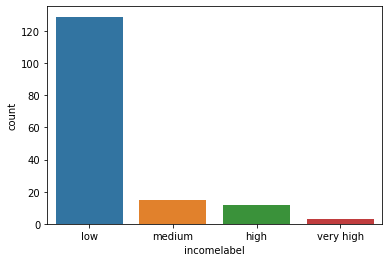

In [29]:
# Freq distribution incomelabel
sns.countplot(x='incomelabel', data=data)

<AxesSubplot:xlabel='cancercaseslabel', ylabel='count'>

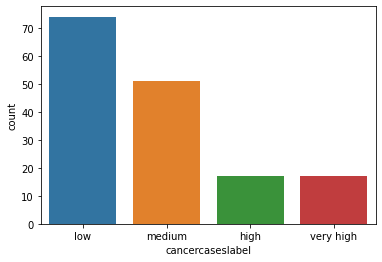

In [31]:
# Freq distribution cancer cases
sns.countplot(x='cancercaseslabel', data=data)

<AxesSubplot:xlabel='lifeexpectlabel', ylabel='count'>

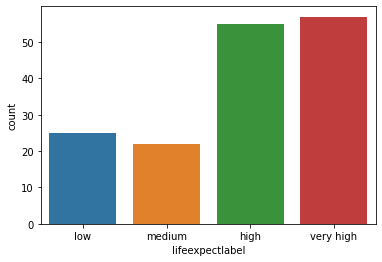

In [34]:
# Freq distribution life expectancy
sns.countplot(x='lifeexpectlabel', data=data)

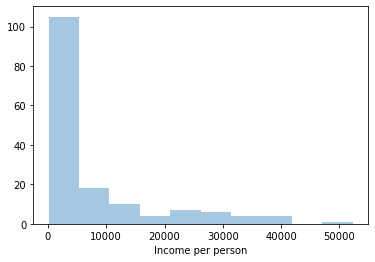

In [37]:
#Histogram income per person
sns.distplot(data['incomeperperson'], bins=10, kde=False)
plt.xlabel('Income per person')
plt.show()

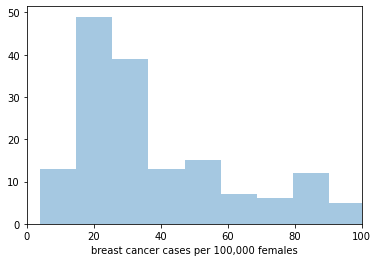

In [38]:
#Histogram Breast Cancer Cases
sns.distplot(data["breastcancerper100th"], kde=False)
plt.xlabel('breast cancer cases per 100,000 females')
plt.xlim(0,100)
plt.show()

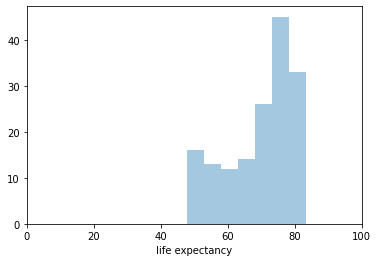

In [40]:
#Histogram Breast Cancer Cases
sns.distplot(data["lifeexpectancy"], kde=False)
plt.xlabel('life expectancy')
plt.xlim(0,100)
plt.show()

Text(0.5, 6.800000000000011, 'continent')

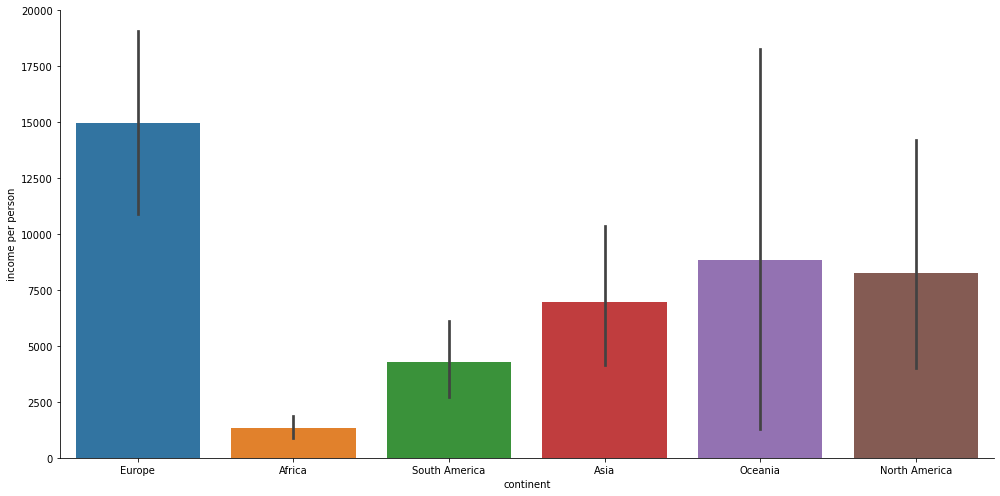

In [44]:
#Show income per person per continent
sns.factorplot(x='continent', y='incomeperperson', data=data, kind='bar', size=7, aspect=2)
plt.ylabel('income per person')
plt.xlabel('continent')

Text(0.5, 6.800000000000011, 'continent')

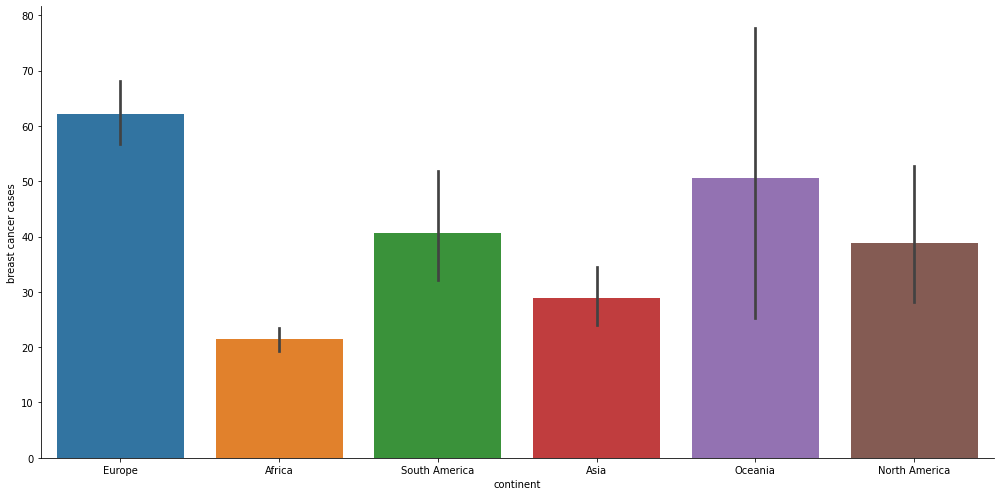

In [41]:
#Show breast cancer incidences per continent
sns.factorplot(x='continent', y='breastcancerper100th', data=data, kind='bar', size=7, aspect=2)
plt.ylabel('breast cancer cases')
plt.xlabel('continent')

Text(0.5, 6.800000000000011, 'continent')

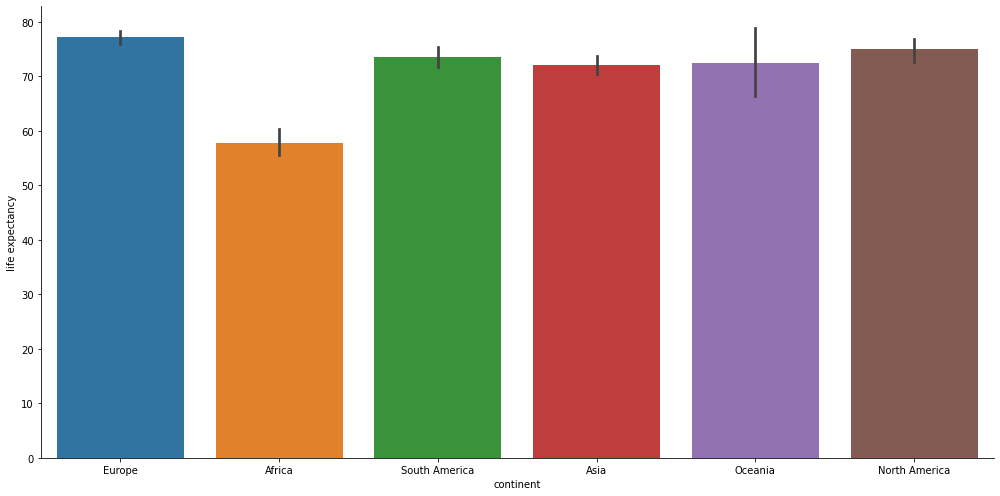

In [45]:
#Show life expectancy per continent
sns.factorplot(x='continent', y='lifeexpectancy', data=data, kind='bar', size=7, aspect=2)
plt.ylabel('life expectancy')
plt.xlabel('continent')